In [17]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data= pd.read_csv("Retail Data.csv")

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1042,536522,85231B,CINAMMON SET OF 9 T-LIGHTS,1,12/1/2010 12:49,0.85,15012.0,United Kingdom
1043,536522,22739,RIBBON REEL CHRISTMAS SOCK BAUBLE,5,12/1/2010 12:49,1.65,15012.0,United Kingdom
1044,536522,37370,RETRO COFFEE MUGS ASSORTED,2,12/1/2010 12:49,1.25,15012.0,United Kingdom
1045,536522,22941,CHRISTMAS LIGHTS 10 REINDEER,1,12/1/2010 12:49,8.50,15012.0,United Kingdom
1046,536522,21098,CHRISTMAS TOILET ROLL,2,12/1/2010 12:49,1.25,15012.0,United Kingdom


In [18]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1042,536522,85231B,CINAMMON SET OF 9 T-LIGHTS,1,12/1/2010 12:49,0.85,15012.0,United Kingdom
1043,536522,22739,RIBBON REEL CHRISTMAS SOCK BAUBLE,5,12/1/2010 12:49,1.65,15012.0,United Kingdom
1044,536522,37370,RETRO COFFEE MUGS ASSORTED,2,12/1/2010 12:49,1.25,15012.0,United Kingdom
1045,536522,22941,CHRISTMAS LIGHTS 10 REINDEER,1,12/1/2010 12:49,8.50,15012.0,United Kingdom
1046,536522,21098,CHRISTMAS TOILET ROLL,2,12/1/2010 12:49,1.25,15012.0,United Kingdom


In [15]:
data.shape
data.info()

 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    1047 non-null   object 
 1   StockCode    1047 non-null   object 
 2   Description  1046 non-null   object 
 3   Quantity     1047 non-null   int64  
 4   InvoiceDate  1047 non-null   object 
 5   UnitPrice    1047 non-null   float64
 6   CustomerID   1046 non-null   float64
 7   Country      1047 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.6+ KB


In [26]:
data.isnull().sum()
data.dropna(inplace=True)
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [29]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1046 entries, 0 to 1046
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    1046 non-null   object 
 1   StockCode    1046 non-null   object 
 2   Description  1046 non-null   object 
 3   Quantity     1046 non-null   int64  
 4   InvoiceDate  1046 non-null   object 
 5   UnitPrice    1046 non-null   float64
 6   CustomerID   1046 non-null   float64
 7   Country      1046 non-null   object 
 8   TotalPrice   1046 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 81.7+ KB


C:\Users\mamoo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


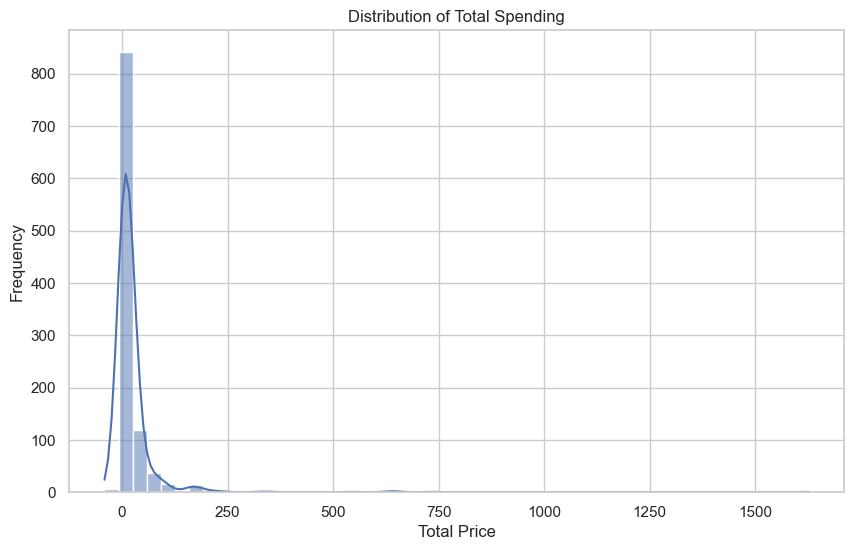

C:\Users\mamoo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


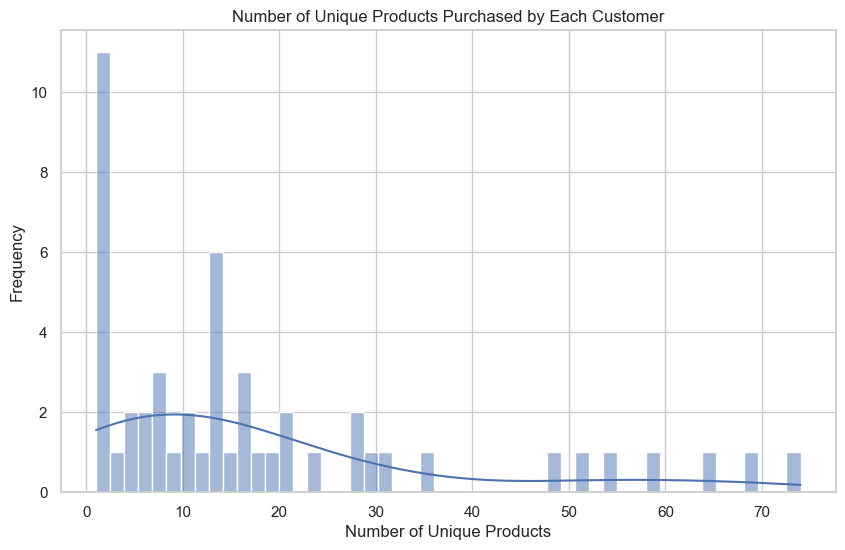

C:\Users\mamoo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


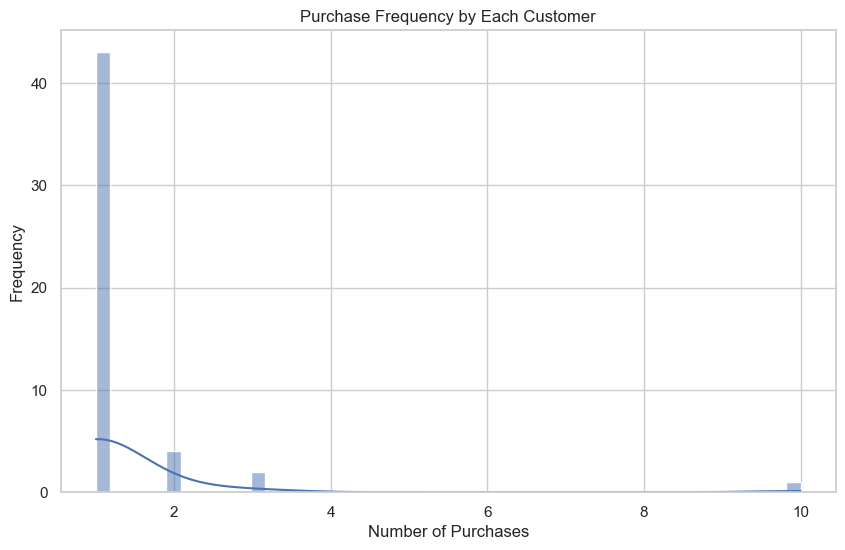

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['TotalPrice'], bins=50, kde=True)
plt.title('Distribution of Total Spending')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

unique_products_per_customer = data.groupby('CustomerID')['StockCode'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(unique_products_per_customer, bins=50, kde=True)
plt.title('Number of Unique Products Purchased by Each Customer')
plt.xlabel('Number of Unique Products')
plt.ylabel('Frequency')
plt.show()

purchase_frequency = data.groupby('CustomerID')['InvoiceNo'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(purchase_frequency, bins=50, kde=True)
plt.title('Purchase Frequency by Each Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.show()



In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

customer_data = data.groupby('CustomerID').agg({
    'TotalPrice': 'sum',
    'StockCode': 'nunique',
    'InvoiceNo': 'nunique'
}).reset_index()

customer_data.columns = ['CustomerID', 'TotalSpending', 'UniqueProducts', 'PurchaseFrequency']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['TotalSpending', 'UniqueProducts', 'PurchaseFrequency']])
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)
customer_data.head()



C:\Users\mamoo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mamoo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,TotalSpending,UniqueProducts,PurchaseFrequency,Cluster
0,12431.0,358.25,14,1,0
1,12583.0,855.86,20,1,0
2,12748.0,4.95,1,1,0
3,12791.0,192.60,2,1,0
4,12838.0,390.79,59,1,1
